### Bussiness Problem Understanding:

***To find out the fradulent trasaction in banking trasaction***


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     

In [44]:
import warnings
warnings.simplefilter("ignore")

In [45]:
df=pd.read_csv("Fraud.csv")

## Data Understanding:
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [46]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [48]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [49]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [50]:
df.drop(columns=["step","nameOrig","nameDest"],inplace=True)

In [51]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


<AxesSubplot:>

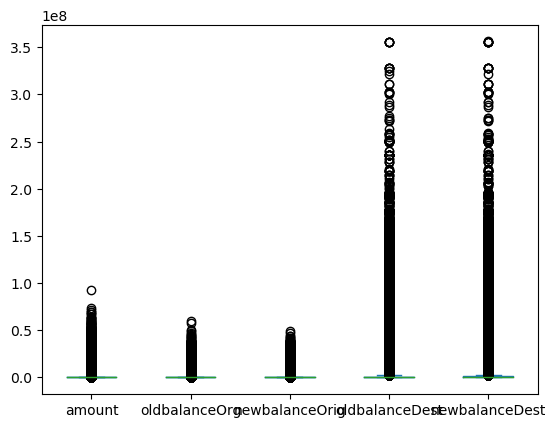

In [52]:
df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].plot(kind="box")


In [53]:
df["amount"].skew()

30.99394948249038

In [54]:
from scipy import stats
df["box_amount"],param=stats.boxcox(df.amount+0.01)
df["box_amount"].skew()

-0.01897116882745448

In [55]:
df["oldbalanceOrg"].skew()

5.249136420603121

In [56]:
from scipy import stats
df["box_oldbalanceOrg"],param=stats.boxcox(df.oldbalanceOrg+0.01)


In [57]:
df["box_oldbalanceOrg"].skew()

-0.2040328105478424

In [58]:
df["newbalanceOrig"].skew()

5.176884001159233

In [59]:
from scipy import stats
df["box_newbalanceOrig"],param=stats.boxcox(df.newbalanceOrig+0.01)


In [60]:
df["box_newbalanceOrig"].skew()

0.3077416938839443

In [61]:
df["oldbalanceDest"].skew()

19.921757915791062

In [62]:
from scipy import stats
df["box_oldbalanceDest"],param=stats.boxcox(df.oldbalanceDest+0.01)
df["box_oldbalanceDest"].skew()

-0.21127780463803456

In [63]:
df["newbalanceDest"].skew()

19.352302057660165

In [64]:
df["box_newbalanceDest"],param=stats.boxcox(df.newbalanceDest+0.01)

In [65]:
df["box_newbalanceDest"].skew()

-0.34336454885234335

In [66]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,16.100764,16.813203,8.782110,-4.236069,-4.014057
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,11.839701,13.099428,7.621837,-4.236069,-4.014057
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,7.060007,5.979102,-5.239437,-4.236069,-4.014057
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,7.060007,5.979102,-5.239437,12.031806,-4.014057
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,16.584003,14.252640,7.870681,-4.236069,-4.014057


In [67]:
df1=df[["type","box_amount","box_oldbalanceOrg","box_newbalanceOrig","box_oldbalanceDest","box_newbalanceDest","isFraud","isFlaggedFraud"]]

In [68]:
df1.head()

,type,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,16.100764,16.813203,8.782110,-4.236069,-4.014057,0,0
1,PAYMENT,11.839701,13.099428,7.621837,-4.236069,-4.014057,0,0
2,TRANSFER,7.060007,5.979102,-5.239437,-4.236069,-4.014057,1,0
3,CASH_OUT,7.060007,5.979102,-5.239437,12.031806,-4.014057,1,0
4,PAYMENT,16.584003,14.252640,7.870681,-4.236069,-4.014057,0,0


In [69]:
#encoding type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["type_l"]=le.fit_transform(df1[["type"]])

In [70]:
df1.head()

,type,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest,isFraud,isFlaggedFraud,type_l
0,PAYMENT,16.100764,16.813203,8.782110,-4.236069,-4.014057,0,0,3
1,PAYMENT,11.839701,13.099428,7.621837,-4.236069,-4.014057,0,0,3
2,TRANSFER,7.060007,5.979102,-5.239437,-4.236069,-4.014057,1,0,4
3,CASH_OUT,7.060007,5.979102,-5.239437,12.031806,-4.014057,1,0,1
4,PAYMENT,16.584003,14.252640,7.870681,-4.236069,-4.014057,0,0,3


In [71]:
df1.drop(columns=["type"],inplace=True)

In [72]:
df1.head()

,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest,isFraud,isFlaggedFraud,type_l
0,16.100764,16.813203,8.782110,-4.236069,-4.014057,0,0,3
1,11.839701,13.099428,7.621837,-4.236069,-4.014057,0,0,3
2,7.060007,5.979102,-5.239437,-4.236069,-4.014057,1,0,4
3,7.060007,5.979102,-5.239437,12.031806,-4.014057,1,0,1
4,16.584003,14.252640,7.870681,-4.236069,-4.014057,0,0,3


In [73]:
df1.corr()

,box_amount,box_oldbalanceOrg,box_newbalanceOrig,box_oldbalanceDest,box_newbalanceDest,isFraud,isFlaggedFraud,type_l
box_amount,1.000000,0.037840,-0.166642,0.610713,0.688687,0.048431,0.004646,-0.339704
box_oldbalanceOrg,0.037840,1.000000,0.742344,0.018322,0.029077,0.034589,0.002333,-0.326666
box_newbalanceOrig,-0.166642,0.742344,1.000000,-0.030021,-0.157202,-0.029650,0.002127,-0.321533
box_oldbalanceDest,0.610713,0.018322,-0.030021,1.000000,0.881880,-0.017257,-0.001815,-0.545224
box_newbalanceDest,0.688687,0.029077,-0.157202,0.881880,1.000000,-0.007412,-0.001965,-0.506874
isFraud,0.048431,0.034589,-0.029650,-0.017257,-0.007412,1.000000,0.044109,0.020833
isFlaggedFraud,0.004646,0.002333,0.002127,-0.001815,-0.001965,0.044109,1.000000,0.002685
type_l,-0.339704,-0.326666,-0.321533,-0.545224,-0.506874,0.020833,0.002685,1.000000


In [80]:
#calicating the vif values
import statsmodels.formula.api as smf
rsq_box_amount=smf.ols("box_amount~box_oldbalanceOrg+box_newbalanceOrig+box_oldbalanceDest+box_newbalanceDest",data=df1).fit().rsquared
vif_box_amount=1/(1-rsq_box_amount)

rsq_box_oldbalanceOrg=smf.ols("box_oldbalanceOrg~box_amount+box_newbalanceOrig+box_oldbalanceDest+box_newbalanceDest",data=df1).fit().rsquared
vif_box_oldbalanceOrg=1/(1-rsq_box_oldbalanceOrg)

rsq_box_newbalanceOrig=smf.ols("box_newbalanceOrig~box_amount+box_oldbalanceOrg+box_oldbalanceDest+box_newbalanceDest",data=df1).fit().rsquared
vif_box_newbalanceOrig=1/(1-rsq_box_newbalanceOrig)

rsq_box_oldbalanceDest=smf.ols("box_oldbalanceDest~box_amount+box_oldbalanceOrg+box_newbalanceOrig+box_newbalanceDest",data=df1).fit().rsquared
vif_box_oldbalanceDest=1/(1-rsq_box_oldbalanceDest)

rsq_box_newbalanceDest=smf.ols("box_newbalanceDest~box_amount+box_oldbalanceOrg+box_oldbalanceDest+box_newbalanceOrig",data=df1).fit().rsquared
vif_box_newbalanceDest=1/(1-rsq_box_newbalanceDest)



#storing vif values 
d1={"Variables":["box_amount","box_oldbalanceOrg","box_newbalanceOrig","box_oldbalanceDest","box_newbalanceDest"],
        "VIF":[vif_box_amount,vif_box_oldbalanceOrg,vif_box_newbalanceOrig,vif_box_oldbalanceDest,vif_box_newbalanceDest]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,box_amount,1.959766
1,box_oldbalanceOrg,2.634177
2,box_newbalanceOrig,2.872853
3,box_oldbalanceDest,5.263859
4,box_newbalanceDest,6.197258


In [81]:
df1.drop(columns=["box_oldbalanceDest","box_newbalanceDest"],inplace=True)

In [82]:
df1.head()

,box_amount,box_oldbalanceOrg,box_newbalanceOrig,isFraud,isFlaggedFraud,type_l
0,16.100764,16.813203,8.782110,0,0,3
1,11.839701,13.099428,7.621837,0,0,3
2,7.060007,5.979102,-5.239437,1,0,4
3,7.060007,5.979102,-5.239437,1,0,1
4,16.584003,14.252640,7.870681,0,0,3


In [84]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [88]:
!pip install imblearn

In [85]:
X=df1.drop(columns=["isFraud"])
y=df1["isFraud"]

In [91]:
#balancing the imbalance data set
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()
X_new,y_new=SMOTE.fit_resample(X,y)
y_new.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [92]:
#train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [93]:
#scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)


In [94]:
#pca:
from sklearn.decomposition import PCA
pca_model=PCA(n_components=0.95)

X_train_pca=pca_model.fit_transform(X_train)
X_test_pca=pca_model.fit_transform(X_test)

In [95]:
pca_model.explained_variance_ratio_

array([0.71203767, 0.20340644, 0.07749088])

In [96]:
X_train_pca.shape

(5090096, 3)

In [38]:
X_train_pca

array([[ 11.71566998, -13.9432332 ,  -5.5021177 ,  -3.72951367],
       [ 11.69407661,  18.14933369,  -0.86980579,  -2.41064782],
       [ 11.55723233,  -3.43576444,   2.84886965,  -0.59031359],
       ...,
       [ 11.05934282,   0.39626487,   5.64871763,  -0.54307921],
       [  9.06174373, -14.03892621,  -3.15806128,  -0.57923464],
       [-20.39829415, -14.72392878,  -1.00064185,   0.50164979]])

In [39]:
a=pd.DataFrame(X_train_pca)

In [40]:
a.corr()

,0,1,2,3
0,1.000000e+00,6.689592e-17,1.360812e-15,-1.495284e-16
1,6.689592e-17,1.000000e+00,-7.469152e-16,4.436918e-16
2,1.360812e-15,-7.469152e-16,1.000000e+00,-3.112470e-15
3,-1.495284e-16,4.436918e-16,-3.112470e-15,1.000000e+00


# Modelling:

In [97]:
#logistic regression
#modelling
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train_pca,y_train)

#prediction
test_pred=log_reg.predict(X_test_pca)
train_pred=log_reg.predict(X_train_pca)

#accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:",accuracy_score(y_test,test_pred))
print("train_accuracy:",accuracy_score(y_train,train_pred))

#crossvalidation score:
from sklearn.model_selection import cross_val_score
print("cross_validation_score:",cross_val_score(log_reg,X,y,cv=5).mean())

test_accuracy: 0.9991057143126574
train_accuracy: 0.9991002134340885
cross_validation_score: 0.9990750665606306


In [98]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_pred)

array([[1270858,      17],
       [   1121,     528]], dtype=int64)

In [99]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270875
           1       0.97      0.32      0.48      1649

    accuracy                           1.00   1272524
   macro avg       0.98      0.66      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524



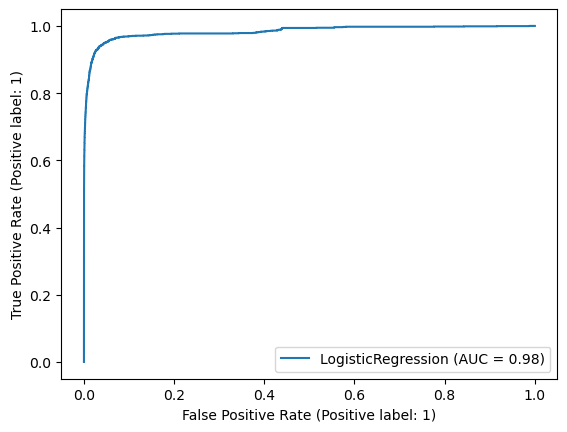

In [100]:
#auc
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg,X_test_pca,y_test)
plt.show()
